In [1]:
# import the packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, CountFrequencyEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser,EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Transactions = pd.read_csv('./data/trans.csv')
Brand = pd.read_csv('./data/brand.csv')
Branch = pd.read_csv('./data/branch.csv')
Customer = pd.read_csv('./data/customer.csv')
Product = pd.read_csv('./data/product.csv',encoding = 'unicode_escape')

In [3]:
df1 = pd.merge(Transactions,Product, how='inner', on='ProductCode').drop_duplicates()
df2 = pd.merge(df1,Branch, how='inner', on='BranchCode').drop_duplicates()
df3 = pd.merge(df2,Brand, how='inner', on='BrandCode').drop_duplicates()
df_final = pd.merge(df3,Customer, how='inner', on='CustomerID').drop_duplicates()

df_final

,TransID,ReceiptNo.,Date,Time,ProductCode,Quantity,Price,BranchCode,CustomerID,ProductCategory,...,BranchRegion,Longitude,Latitude,BrandName,NRIC,Name,Gender,Address,Region,Age
0,14207,4009083,16-Jan-2020,3:39:12 pm,406,1,23.0,112,1001381,Cake,...,WEST,103.705546,1.338840,CakeFresh,S4500988C,Khoo Yue Mun,Male,"Hougang,Ave10,BLK10,#9-981",Northeast,53
1,45386,4026397,17-Feb-2020,8:50:24 pm,410,2,10.0,112,1001381,Cake,...,WEST,103.705546,1.338840,CakeFresh,S4500988C,Khoo Yue Mun,Male,"Hougang,Ave10,BLK10,#9-981",Northeast,53
2,545113,4329280,15-Jul-2021,3:23:12 pm,399,3,28.0,107,1001381,Cake,...,CENTRAL,103.792648,1.331521,CakeFresh,S4500988C,Khoo Yue Mun,Male,"Hougang,Ave10,BLK10,#9-981",Northeast,53
3,246518,4138536,11-Sep-2020,5:33:36 pm,400,4,22.0,107,1001381,Cake,...,CENTRAL,103.792648,1.331521,CakeFresh,S4500988C,Khoo Yue Mun,Male,"Hougang,Ave10,BLK10,#9-981",Northeast,53
4,345857,4195153,22-Dec-2020,3:02:24 pm,404,2,25.0,107,1001381,Cake,...,CENTRAL,103.792648,1.331521,CakeFresh,S4500988C,Khoo Yue Mun,Male,"Hougang,Ave10,BLK10,#9-981",Northeast,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360659,114010,9064194,28-Apr-2020,11:47:12 am,394,1,10.0,114,1000810,Appetiser,...,WEST,103.762500,1.380800,RamenFresh,S5993774H,Chua Hock Fook,Male,"Bukit Merah,Ave1,BLK4,#3-1665",Central,79
360660,171443,9095927,25-Jun-2020,4:09:36 pm,398,4,3.0,114,1000810,Desserts,...,WEST,103.762500,1.380800,RamenFresh,S5993774H,Chua Hock Fook,Male,"Bukit Merah,Ave1,BLK4,#3-1665",Central,79
360661,114011,9064194,28-Apr-2020,11:47:12 am,392,5,6.0,114,1000810,Rice,...,WEST,103.762500,1.380800,RamenFresh,S5993774H,Chua Hock Fook,Male,"Bukit Merah,Ave1,BLK4,#3-1665",Central,79
360662,194139,9108422,19-Jul-2020,3:01:36 pm,396,2,9.0,109,1000810,Appetiser,...,EAST,103.986389,1.391111,RamenFresh,S5993774H,Chua Hock Fook,Male,"Bukit Merah,Ave1,BLK4,#3-1665",Central,79


In [4]:
df_final['Revenue'] = df_final['Quantity'] * df_final['Price']

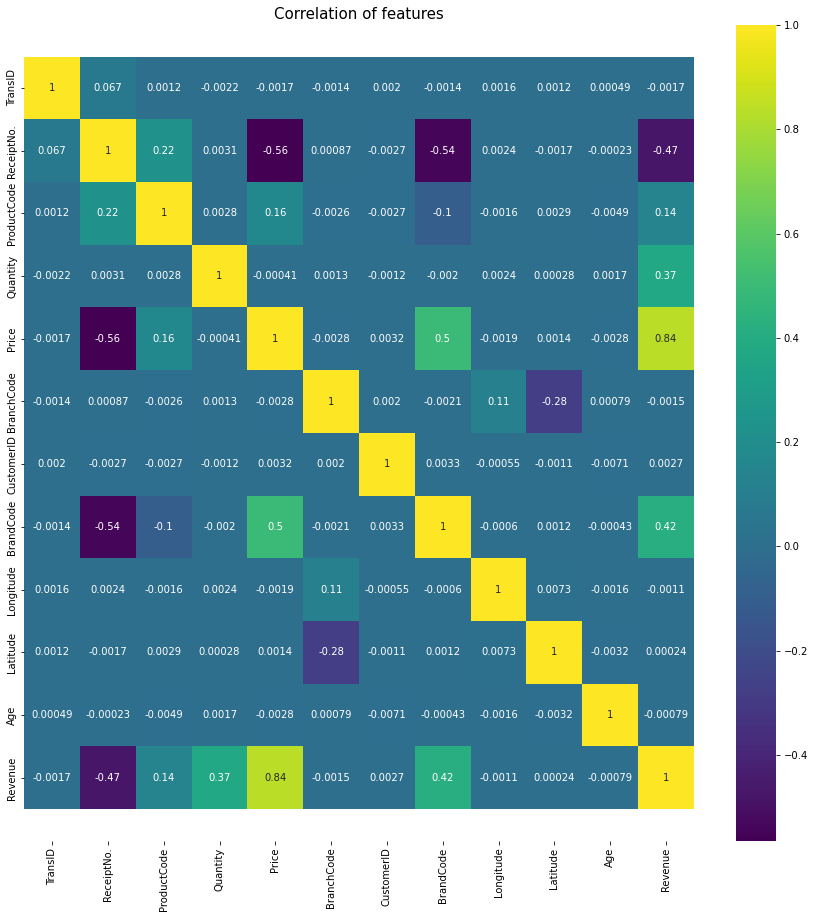

In [5]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of features', size=15)
ax = sns.heatmap(df_final.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [6]:
df_final = df_final.drop('Quantity', axis = 1)
df_final = df_final.drop('Price', axis = 1)
df_final = df_final.drop('Date', axis = 1)
df_final = df_final.drop('Time', axis = 1)
df_final = df_final.drop('NRIC', axis = 1)
df_final = df_final.drop('Address', axis = 1)
#df_final = df_final.drop('ReceiptNo.', axis = 1)
#df_final = df_final.drop('TransID', axis = 1)
#df_final = df_final.drop('ProductCode', axis = 1)
#df_final = df_final.drop('CustomerID', axis = 1)

In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360664 entries, 0 to 360663
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransID          360664 non-null  int64  
 1   ReceiptNo.       360664 non-null  int64  
 2   ProductCode      360664 non-null  int64  
 3   BranchCode       360664 non-null  int64  
 4   CustomerID       360664 non-null  int64  
 5   ProductCategory  360664 non-null  object 
 6   ProductName      360664 non-null  object 
 7   BrandCode        360664 non-null  int64  
 8   BranchLocation   360664 non-null  object 
 9   BranchRegion     360664 non-null  object 
 10  Longitude        360664 non-null  float64
 11  Latitude         360664 non-null  float64
 12  BrandName        360664 non-null  object 
 13  Name             360664 non-null  object 
 14  Gender           360664 non-null  object 
 15  Region           360664 non-null  object 
 16  Age              360664 non-null  int6

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df_final.drop('Revenue', axis=1), df_final['Revenue'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((252464, 17), (108200, 17))

In [9]:
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered')
ordinal_enc.fit(X_train,y_train)
X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

X_train_enc.head()

,TransID,ReceiptNo.,ProductCode,BranchCode,CustomerID,ProductCategory,ProductName,BrandCode,BranchLocation,BranchRegion,Longitude,Latitude,BrandName,Name,Gender,Region,Age
281222,167305,8093335,364,110,1000944,16,87,201,15,3,103.949516,1.372518,3,317,0,3,42
104370,285120,9159362,396,114,1000391,16,83,204,6,4,103.762500,1.380800,2,1464,1,4,37
246145,375699,5213850,314,119,1000613,17,108,206,1,1,103.886253,1.361218,4,552,1,1,89
149705,282027,8157157,370,109,1000402,16,88,201,12,3,103.986389,1.391111,3,606,0,3,73
240680,555375,6335038,342,103,1001288,11,60,202,10,2,103.786057,1.436046,1,590,1,2,57


In [10]:
train_t = X_train_enc
test_t = X_test_enc
#train_t = X_train
#test_t = X_test

scaler = StandardScaler()
scaler.fit(train_t)
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Step 4: Machine Learning Modelling

In [11]:
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_train_preds_linreg = linreg.predict(X_train_scaled)
y_test_preds_linreg = linreg.predict(X_test_scaled)
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")

The LinReg Model's MSE on train data is 675.3824.
The LinReg Model's MSE on test data is 676.2579.

The LinReg Model's RMSE on train data is 25.9881.
The LinReg Model's RMSE on test data is 26.0050.

The LinReg Model's R2 on train data is 0.5559.
The LinReg Model's R2 on test data is 0.5525.


In [12]:
linreg_ss_importance = linreg.coef_
df_linreg_ss_feature_importance = pd.DataFrame(X_train_scaled.columns, columns=["feature"])
df_linreg_ss_feature_importance["importance"] = linreg_ss_importance
df_linreg_ss_feature_importance.sort_values("importance", ascending=False)

,feature,importance
6,ProductName,18.220794
7,BrandCode,7.224104
5,ProductCategory,5.217418
12,BrandName,2.585964
13,Name,1.431169
0,TransID,0.289613
8,BranchLocation,0.139614
16,Age,0.063616
3,BranchCode,0.024683
10,Longitude,0.020149
